<a href="https://colab.research.google.com/github/paolopetta/FIA-Yourbook/blob/main/Yourbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
#Import delle librerie necessarie
import numpy as np
import pandas as pd
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import requests

In [214]:
#Import dei dataset con le informazioni:
#user.cvs -> info sugli utenti
#book.cvs -> info su i libri
#ratings.cvs -> votazioni che utenti hanno dati ai libri
#Inoltre, l'import elimina tutte le righe dei dataset che non sono corrette 
users = pd.read_csv('Users.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')
books = pd.read_csv('Books.csv', error_bad_lines=False, delimiter=';', engine = 'python' , encoding = 'ISO-8859-1')
ratings = pd.read_csv('Ratings.csv', error_bad_lines=False, delimiter=';', engine = 'python' , encoding = 'ISO-8859-1')

Skipping line 815: ';' expected after '"'
Skipping line 1679: ';' expected after '"'
Skipping line 2531: ';' expected after '"'
Skipping line 2640: ';' expected after '"'
Skipping line 3236: ';' expected after '"'
Skipping line 3256: ';' expected after '"'
Skipping line 4906: ';' expected after '"'
Skipping line 6452: ';' expected after '"'
Skipping line 8349: ';' expected after '"'
Skipping line 9669: ';' expected after '"'
Skipping line 9723: ';' expected after '"'
Skipping line 10010: ';' expected after '"'
Skipping line 10192: ';' expected after '"'
Skipping line 10754: ';' expected after '"'
Skipping line 10824: ';' expected after '"'
Skipping line 10862: ';' expected after '"'
Skipping line 11442: ';' expected after '"'
Skipping line 11584: ';' expected after '"'
Skipping line 11859: ';' expected after '"'
Skipping line 12206: ';' expected after '"'
Skipping line 12229: ';' expected after '"'
Skipping line 12719: ';' expected after '"'
Skipping line 12885: ';' expected after '"'


Skipping line 86694: ';' expected after '"'
Skipping line 86822: ';' expected after '"'
Skipping line 87322: ';' expected after '"'
Skipping line 87757: ';' expected after '"'
Skipping line 87950: ';' expected after '"'
Skipping line 88000: ';' expected after '"'
Skipping line 88405: ';' expected after '"'
Skipping line 88698: ';' expected after '"'
Skipping line 88809: ';' expected after '"'
Skipping line 88980: ';' expected after '"'
Skipping line 89309: ';' expected after '"'
Skipping line 89988: ';' expected after '"'
Skipping line 90052: ';' expected after '"'
Skipping line 90062: ';' expected after '"'
Skipping line 90210: ';' expected after '"'
Skipping line 91033: ';' expected after '"'
Skipping line 91338: ';' expected after '"'
Skipping line 91603: ';' expected after '"'
Skipping line 91658: ';' expected after '"'
Skipping line 91950: ';' expected after '"'
Skipping line 92038: ';' expected after '"'
Skipping line 92099: ';' expected after '"'
Skipping line 92232: ';' expecte

Skipping line 171492: ';' expected after '"'
Skipping line 172648: ';' expected after '"'
Skipping line 172655: ';' expected after '"'
Skipping line 173268: ';' expected after '"'
Skipping line 173779: ';' expected after '"'
Skipping line 174525: ';' expected after '"'
Skipping line 174617: ';' expected after '"'
Skipping line 174914: ';' expected after '"'
Skipping line 175627: ';' expected after '"'
Skipping line 175836: ';' expected after '"'
Skipping line 176055: ';' expected after '"'
Skipping line 176218: ';' expected after '"'
Skipping line 176323: ';' expected after '"'
Skipping line 176463: ';' expected after '"'
Skipping line 176778: ';' expected after '"'
Skipping line 177387: ';' expected after '"'
Skipping line 177398: ';' expected after '"'
Skipping line 177568: ';' expected after '"'
Skipping line 177979: ';' expected after '"'
Skipping line 178833: ';' expected after '"'
Skipping line 179312: ';' expected after '"'
Skipping line 179568: ';' expected after '"'
Skipping l

Skipping line 248581: ';' expected after '"'
Skipping line 249082: ';' expected after '"'
Skipping line 249549: ';' expected after '"'
Skipping line 249612: ';' expected after '"'
Skipping line 249797: ';' expected after '"'
Skipping line 249913: ';' expected after '"'
Skipping line 249989: ';' expected after '"'
Skipping line 250051: ';' expected after '"'
Skipping line 250145: ';' expected after '"'
Skipping line 250388: ';' expected after '"'
Skipping line 250403: ';' expected after '"'
Skipping line 250404: ';' expected after '"'
Skipping line 250440: ';' expected after '"'
Skipping line 250767: ';' expected after '"'
Skipping line 251090: ';' expected after '"'
Skipping line 251296: ';' expected after '"'
Skipping line 251297: ';' expected after '"'
Skipping line 252116: ';' expected after '"'
Skipping line 252233: ';' expected after '"'
Skipping line 253468: ';' expected after '"'
Skipping line 253871: ';' expected after '"'
Skipping line 253894: ';' expected after '"'
Skipping l

In [215]:
#Inizia la fase di preparazione dei dati di ratings
#Rimuoviamo tutti i duplicati presenti
ratings.drop_duplicates(inplace=True, keep='first') 

In [216]:
#Rimuoviamo le righe di rating che sono nulle
ratings = ratings.dropna()
#stampiamo la dimesione della tabella di ratings
print(ratings.shape)

(1149766, 3)


In [217]:
#stampiamo la media delle votazioni
ratings['Book-Rating'].mean()

2.8669059617348225

In [218]:
#rimuoviamo da rating tutte le votazioni dei libri uguali a 0
ratings = ratings[ratings['Book-Rating'] != 0]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433659 entries, 1 to 1149765
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433659 non-null  int64 
 1   ISBN         433659 non-null  object
 2   Book-Rating  433659 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


In [219]:
#Inizia la fase di preparazione dei dati di user
#stampiamo le informazioni di user-id
users['User-ID'].describe()

count    278858.00000
mean     139429.50000
std       80499.51502
min           1.00000
25%       69715.25000
50%      139429.50000
75%      209143.75000
max      278858.00000
Name: User-ID, dtype: float64

In [220]:
#Stampa la somma di tutti gli userid che sono null
print(users['User-ID'].isnull().sum())

0


In [221]:
#andiamo ad eliminare tutti gli user che sono null
users_df0 = users.dropna()

In [222]:
#gli userid erano scritti come float e li trasformiamo in int
users_df0['User-ID'].astype(np.int64)

1              2
3              4
5              6
9             10
10            11
           ...  
278848    278849
278850    278851
278851    278852
278852    278853
278854    278855
Name: User-ID, Length: 168096, dtype: int64

In [223]:
#Merge tra ratings e user
B1 = pd.merge(ratings, users_df0, on='User-ID', how='left')

In [224]:
#Merge b1 e books
B2 = pd.merge(B1, books, on='ISBN', how='left')

In [225]:
#Cancelliamo tutti i dati che sono null
B3 = B2.dropna()
#Abbiamo ottenuto una tabella unita e di molto ridotta rispetto alle tabelle iniziali
print(B3.shape)

(268917, 12)


In [226]:
#Rinominiamo le colonne
B3.rename(columns={
    'User-ID': 'User_ID', 
    'Book-Rating': 'Book_Rating', 
    'Book-Title': 'Book_Title',
    'Book-Author': 'Book_Author',
    'Year-Of-Publication': 'Year_Of_Publication'
}, inplace=True)

C:\Users\pavil\miniconda3\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [227]:
B3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268917 entries, 1 to 433657
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User_ID              268917 non-null  int64  
 1   ISBN                 268917 non-null  object 
 2   Book_Rating          268917 non-null  int64  
 3   Location             268917 non-null  object 
 4   Age                  268917 non-null  float64
 5   Book_Title           268917 non-null  object 
 6   Book_Author          268917 non-null  object 
 7   Year_Of_Publication  268917 non-null  float64
 8   Publisher            268917 non-null  object 
 9   Image-URL-S          268917 non-null  object 
 10  Image-URL-M          268917 non-null  object 
 11  Image-URL-L          268917 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 26.7+ MB


In [228]:
bn = B3["Book_Title"].value_counts()

In [229]:
B3["User_ID"].value_counts()

98391     5687
153662    1843
235105    1020
171118     959
16795      956
          ... 
64864        1
77146        1
217983       1
87381        1
140228       1
Name: User_ID, Length: 40490, dtype: int64

In [230]:
user = B3['User_ID'].astype("str")
user.describe()

count     268917
unique     40490
top        98391
freq        5687
Name: User_ID, dtype: object

In [231]:
#Eliminiamo tutti gli utenti che hanno età >= 80 || <= 10
B4 = B3.drop(B3[B3['Age'] >= 80].index)
B4.shape

(267701, 12)

In [232]:
B4 = B4.drop(B4[B4['Age'] <= 10].index)
B4.shape

(265986, 12)

In [233]:
#Eliminiarmo tutti i libri pubblicati dal 2010 in poi e prima del 1200
B4 = B4.drop(B4[B4['Year_Of_Publication'] >= 2010].index)
B4.shape

(265964, 12)

In [234]:
B4['Year_Of_Publication'].describe()

count    265964.000000
mean       1965.268363
std         244.926071
min           0.000000
25%        1992.000000
50%        1998.000000
75%        2001.000000
max        2006.000000
Name: Year_Of_Publication, dtype: float64

In [235]:
B4 = B4.drop(B4[B4['Year_Of_Publication'] <= 1200].index)
B4.shape

(261900, 12)

In [236]:
bn = B4["Book_Title"].value_counts()

<AxesSubplot:title={'center':'Book_Rating Distribution'}, ylabel='Frequency'>

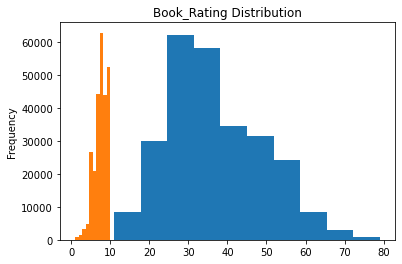

In [237]:
#Assegnamo a user tutti gli id e ne eliminiamo i duplicati
user = B4['User_ID']
user.drop_duplicates(inplace=True, keep='first') 

#grafico che rappresenta la frequenza delle votazioni e la frequenza di una determinata età degli utenti
#x (da 0 a 10) votazione dei libri, (da 11 a 80) età degli utenti
#y frequenza di questi componenti
user = pd.merge(user, B4, on='User_ID', how='left')
user['Age'].plot(kind='hist', title='Age Distribution',)
B4['Book_Rating'].plot(kind='hist', title='Book_Rating Distribution',)

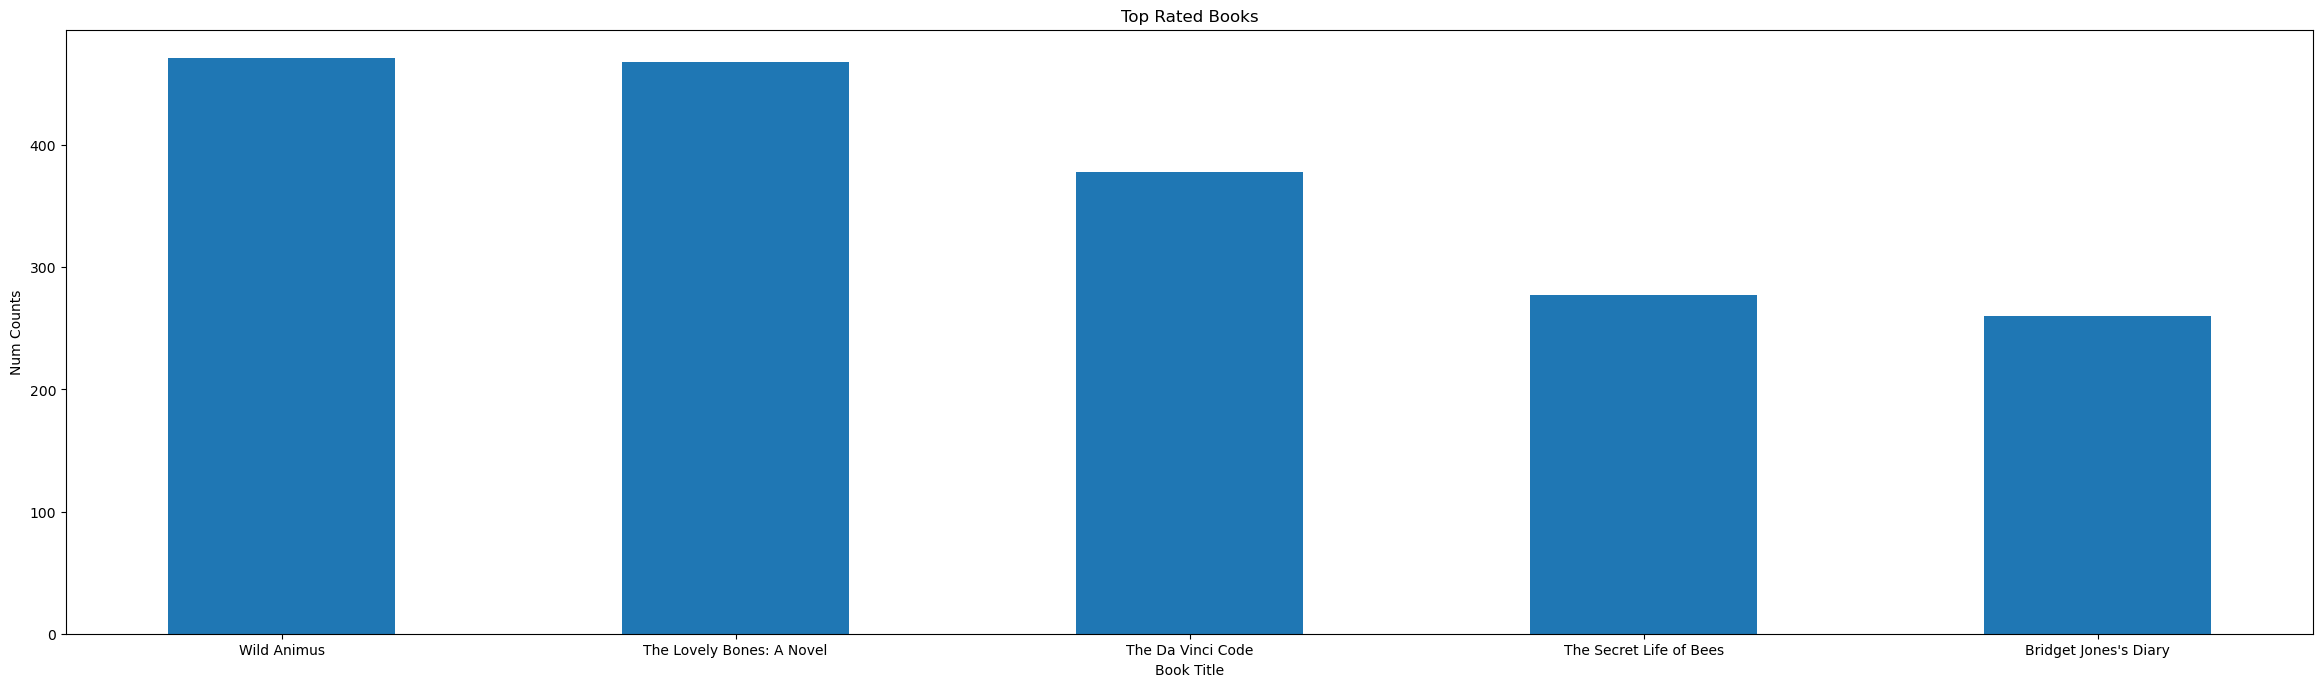

In [238]:
from matplotlib import pyplot as plt
from matplotlib import font_manager

#grafico con i 5 libri più apprezzati (*)
data1 = B4.groupby(by="Book_Title").count().sort_values(by="Book_Rating", ascending=False)[:5]["Book_Rating"]
_x = data1.index
_y = data1.values


plt.figure(figsize=(29,8), dpi=100)
plt.bar(range(len(_x)), _y, width=0.5)

plt.xticks(range(len(_x)), _x)
plt.xlabel("Book Title")
plt.ylabel("Num Counts")
plt.title("Top Rated Books")
plt.show()

In [239]:
user = B4['User_ID'].astype("str")

In [240]:
B4["User_ID"].value_counts()

98391     5687
153662    1831
235105    1017
16795      953
171118     951
          ... 
97816        1
99847        1
236996       1
245184       1
82280        1
Name: User_ID, Length: 39401, dtype: int64

In [241]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite

In [242]:
#dataset su cui lavorare, ancora da modificare
data = B4

In [243]:
#stampa dei primi 20 elmenti, da modificare se lo manteniamo
data.head(100)

,User_ID,ISBN,Book_Rating,Location,Age,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,276729,052165615X,3,"rijeka, n/a, croatia",16.0,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,"rijeka, n/a, croatia",16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
7,276747,0060517794,9,"iowa city, iowa, usa",25.0,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...
8,276747,0671537458,9,"iowa city, iowa, usa",25.0,Waiting to Exhale,Terry McMillan,1995.0,Pocket,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...
9,276747,0679776818,8,"iowa city, iowa, usa",25.0,Birdsong: A Novel of Love and War,Sebastian Faulks,1997.0,Vintage Books USA,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
157,276872,042518109X,8,"são paulo, são paulo, brazil",43.0,Whispers,Dean R. Koontz,2001.0,Berkley Publishing Group,http://images.amazon.com/images/P/042518109X.0...,http://images.amazon.com/images/P/042518109X.0...,http://images.amazon.com/images/P/042518109X.0...
158,276872,0425188221,7,"são paulo, são paulo, brazil",43.0,Shadowland,Peter Straub,2003.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425188221.0...,http://images.amazon.com/images/P/0425188221.0...,http://images.amazon.com/images/P/0425188221.0...
161,276872,8571648972,10,"são paulo, são paulo, brazil",43.0,EstaÃ§Ã£o Carandiru,Drauzio Varella,1999.0,Companhia das Letras,http://images.amazon.com/images/P/8571648972.0...,http://images.amazon.com/images/P/8571648972.0...,http://images.amazon.com/images/P/8571648972.0...
191,276896,0440241537,10,"mena, arkansas, usa",14.0,The King of Torts,JOHN GRISHAM,2003.0,Dell,http://images.amazon.com/images/P/0440241537.0...,http://images.amazon.com/images/P/0440241537.0...,http://images.amazon.com/images/P/0440241537.0...


In [244]:

data['ISBN'] = pd.to_numeric(data['ISBN'],errors='coerce')
data.dropna(inplace=True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240441 entries, 2 to 433657
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User_ID              240441 non-null  int64  
 1   ISBN                 240441 non-null  float64
 2   Book_Rating          240441 non-null  int64  
 3   Location             240441 non-null  object 
 4   Age                  240441 non-null  float64
 5   Book_Title           240441 non-null  object 
 6   Book_Author          240441 non-null  object 
 7   Year_Of_Publication  240441 non-null  float64
 8   Publisher            240441 non-null  object 
 9   Image-URL-S          240441 non-null  object 
 10  Image-URL-M          240441 non-null  object 
 11  Image-URL-L          240441 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 23.8+ MB


In [245]:
#eliminazione delle immagini
data.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [246]:
G = nx.Graph()
m=list(data['User_ID'])
n=list(data['Book_Title'])
zip_list=list(zip(m,n))
# Add nodes with the node attribute "bipartite"
G.add_nodes_from(m, bipartite=0)
G.add_nodes_from(n, bipartite=1)
G.add_edges_from(list(zip(m,n))) 
    
bipartite.is_bipartite(G)

True

In [247]:
#G.adj

In [248]:
#togliere quello sopra assolutamente
#print(nx.adjacency_matrix(G).todense())

In [249]:
pdd = pd.DataFrame(zip_list,columns=['source','target'])
pdd.head()

,source,target
0,276729,The Amsterdam Connection : Level 4 (Cambridge ...
1,276747,Little Altars Everywhere
2,276747,Waiting to Exhale
3,276747,Birdsong: A Novel of Love and War
4,276747,How to Deal With Difficult People


In [250]:
top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes

In [251]:
cent = nx.degree_centrality(G)
name = []
centrality = []

for key, value in cent.items():
    name.append(key)
    centrality.append(value)

In [252]:
cent = pd.DataFrame()    
cent['name'] = name
cent['centrality'] = centrality
cent = cent.sort_values(by='centrality', ascending=False)

In [253]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [254]:
data1 = data.copy()

In [255]:
#eliminiamo altri dati inutili
data.drop(['Book_Title','Publisher','Location'],axis=1,inplace=True)

In [256]:
#stampa dei dati risultanti
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240441 entries, 2 to 433657
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User_ID              240441 non-null  int64  
 1   ISBN                 240441 non-null  float64
 2   Book_Rating          240441 non-null  int64  
 3   Age                  240441 non-null  float64
 4   Book_Author          240441 non-null  object 
 5   Year_Of_Publication  240441 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 12.8+ MB


In [257]:
#prendiamo i get dummies su bookauthor
data_encoded = pd.get_dummies(data, columns=["Book_Author"], sparse=True)                  
data_encoded
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240441 entries, 2 to 433657
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User_ID              240441 non-null  int64  
 1   ISBN                 240441 non-null  float64
 2   Book_Rating          240441 non-null  int64  
 3   Location             240441 non-null  object 
 4   Age                  240441 non-null  float64
 5   Book_Title           240441 non-null  object 
 6   Book_Author          240441 non-null  object 
 7   Year_Of_Publication  240441 non-null  float64
 8   Publisher            240441 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 18.3+ MB


In [258]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240441 entries, 2 to 433657
Columns: 46760 entries, User_ID to Book_Author_Ã?Â?pictÃ?Â¨te
dtypes: Sparse[uint8, 0](46755), float64(3), int64(2)
memory usage: 12.2 MB


In [259]:
# minmax scaler (this part is referred from HW2)
scaler = MinMaxScaler()

#andiamo a creare i dataset per il training e il test
#molto ridotti per mancanza di capacità di elaborazione
train = data_encoded[:1000]
test = data_encoded[1001:1101]

#train, test = np.split(data_encoded.sample(frac=0.01), [int(.6*len(data_encoded))], [int(.4*len(data_encoded))])
#print(train)
#print(test)

#train_X,test_X = train_test_split(data_encoded, test_size=0.3, random_state=930)
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
print(X_test)

C:\Users\pavil\miniconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\pavil\miniconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\pavil\miniconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


[[1.         0.04504143 0.66666667 ... 0.         0.         0.        ]
 [1.         0.04569926 0.66666667 ... 0.         0.         0.        ]
 [1.         0.05669997 0.88888889 ... 0.         0.         0.        ]
 ...
 [1.11327078 0.06884548 1.         ... 0.         0.         0.        ]
 [1.11327078 0.07053909 0.66666667 ... 0.         0.         0.        ]
 [1.11863271 0.07507484 0.77777778 ... 0.         0.         0.        ]]


In [260]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240441 entries, 2 to 433657
Columns: 46760 entries, User_ID to Book_Author_Ã?Â?pictÃ?Â¨te
dtypes: Sparse[uint8, 0](46755), float64(3), int64(2)
memory usage: 12.2 MB


In [261]:
X = scaler.transform(data_encoded[:1000])

C:\Users\pavil\miniconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [262]:
print(X)

[[0.         0.05343092 0.55555556 ... 0.         0.         0.        ]
 [0.01206434 0.00599327 0.88888889 ... 0.         0.         0.        ]
 [0.01206434 0.06883041 0.88888889 ... 0.         0.         0.        ]
 ...
 [1.         0.0322702  1.         ... 0.         0.         0.        ]
 [1.         0.0322702  1.         ... 0.         0.         0.        ]
 [1.         0.03234712 1.         ... 0.         0.         0.        ]]


In [284]:
#grafico di punto di gomito
K = range(1, 7)
meanDispersions = [] 
for k in K:
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X_train)
    
    meanDispersions.append(kmeans.inertia_)
      

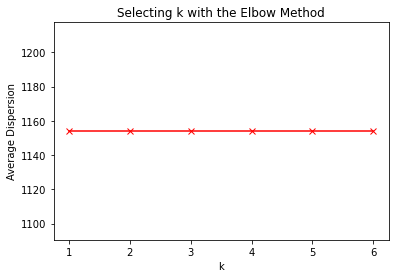

In [285]:
plt.plot(K, meanDispersions, 'rx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show() 

In [ ]:
kmeans = KMeans(n_clusters=3)

y1 = kmeans.fit_predict(X_train)
y2 = kmeans.predict(X_test)
whole_data = kmeans.predict(X)

#generate two subsets with data generated from last step 
train = pd.DataFrame(X_train, columns = data_encoded.columns)
test = pd.DataFrame(X_test, columns = data_encoded.columns)
#then add the prediction of clustering to these data
train['Cluster'] = y1
test['Cluster'] = y2
data1= data1[:1000]
data1['Cluster']= whole_data

In [ ]:
# check the outcomes of each cluster
groupby1 = data1.groupby(by='Cluster').mean()
groupby1

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y1, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(X, y1)
print("Silouhette score: " + str(score))

In [ ]:
merged = ratings.merge(books, on = 'ISBN')
merged.head()
merged.info()

In [ ]:
#merge the data with number of ratings
merged_groupby=merged.groupby('Book-Title')['Book-Rating'].count().reset_index()
merged_groupby.rename(columns={'Book-Rating':'number_of_ratings'},inplace=True)
#filter books with more than 30 reviews 
merged_groupby=merged_groupby[merged_groupby['number_of_ratings']>30]
merged_groupby.head()

In [ ]:
#merge the above two files together to get an integrated book review data with total review count for each book;then remove the duplicates
integrated_merged=merged.merge(merged_groupby, on='Book-Title')
integrated_merged.drop_duplicates(['User-ID','Book-Title'],inplace=True)
integrated_merged.head()
integrated_merged.info()

In [ ]:
pivot=pd.pivot_table(integrated_merged, columns='User-ID',index='Book-Title',fill_value=0,values='Book-Rating')
pivot.shape
pivot

In [ ]:
pivot_csr=csr_matrix(pivot)
pivot_csr

In [ ]:
#construct kNN models
model=NearestNeighbors(algorithm='brute')
model.fit(pivot_csr)

In [ ]:
pivot.iloc[:,:].values.reshape(1,-1)
#example of k neighbors 
distances,suggestions=model.kneighbors(pivot.iloc[55,:].values.reshape(1,-1))

In [ ]:
distances

In [ ]:
suggestions

In [ ]:
#test the kNN collaborative filtering model
for i in range(len(suggestions)):
    print(pivot.index[suggestions[i]])
    print(suggestions[i])

In [ ]:
list1=list(B3['Book_Title'])
list1

In [ ]:
#final recommender system function building
def book_recommend(book_name):
    if book_name in list1:
        book_id = np.where(pivot.index == book_name)[0][0]
        distances, recommendations = model.kneighbors(pivot.iloc[book_id,:].values.reshape(1,-1))
        print('begin to recommend all books similar to this book!!!')
        for i in range(len(recommendations)):
            if i == 0:
                print(f"For book \"{book_name}\" we would recommend the following:")
            if not i:
                list2=pivot.index[recommendations[i]]
                for j in range(len(list2)):
                    print(list2[j])
    else:
        raise ValueError

In [ ]:
name=input('Please Input a book name: ')
book_recommend(name)